In [81]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')

In [82]:
df = pd.read_csv('data/raw.csv')

In [83]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [84]:
df.shape

(1000, 8)

In [85]:
df.info()


<class 'pandas.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   gender                       1000 non-null   str  
 1   race/ethnicity               1000 non-null   str  
 2   parental level of education  1000 non-null   str  
 3   lunch                        1000 non-null   str  
 4   test preparation course      1000 non-null   str  
 5   math score                   1000 non-null   int64
 6   reading score                1000 non-null   int64
 7   writing score                1000 non-null   int64
dtypes: int64(3), str(5)
memory usage: 62.6 KB


In [86]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


Dataset Information:

- gender
- race_ethnicity
- parental_level_of_education
- lunch
- test_preparation_course
- math_score
- reading_score
- writing_score


In [87]:
df.isnull().sum()


gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [88]:
df.duplicated().sum()


np.int64(0)

In [89]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [90]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [91]:
df.nunique()


gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [92]:
df.columns = (
    df.columns
    .str.strip()
    .str.lower()
    .str.replace(" ", "_")
    .str.replace("/", "_")
)


In [93]:
print(df.columns)


Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score'],
      dtype='str')


In [94]:

print("Categories in 'gender' variable:     ",end=" " )
print(df['gender'].unique())

print("Categories in 'race_ethnicity' variable:  ",end=" ")
print(df['race_ethnicity'].unique())

print("Categories in'parental level of education' variable:",end=" " )
print(df['parental_level_of_education'].unique())

print("Categories in 'lunch' variable:     ",end=" " )
print(df['lunch'].unique())

print("Categories in 'test preparation course' variable:     ",end=" " )
print(df['test_preparation_course'].unique())

Categories in 'gender' variable:      <StringArray>
['female', 'male']
Length: 2, dtype: str
Categories in 'race_ethnicity' variable:   <StringArray>
['group B', 'group C', 'group A', 'group D', 'group E']
Length: 5, dtype: str
Categories in'parental level of education' variable: <StringArray>
[ 'bachelor's degree',       'some college',    'master's degree',
 'associate's degree',        'high school',   'some high school']
Length: 6, dtype: str
Categories in 'lunch' variable:      <StringArray>
['standard', 'free/reduced']
Length: 2, dtype: str
Categories in 'test preparation course' variable:      <StringArray>
['none', 'completed']
Length: 2, dtype: str


In [95]:
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 8 numerical features : ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course', 'math_score', 'reading_score', 'writing_score']

We have 0 categorical features : []


In [96]:
df.head(2)


,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88


In [97]:

df['total score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['average'] = df['total score']/3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [98]:

reading_full = df[df['reading_score'] == 100]['average'].count()
writing_full = df[df['writing_score'] == 100]['average'].count()
math_full = df[df['math_score'] == 100]['average'].count()

print(f'Number of students with full marks in Maths: {math_full}')
print(f'Number of students with full marks in Writing: {writing_full}')
print(f'Number of students with full marks in Reading: {reading_full}')

Number of students with full marks in Maths: 7
Number of students with full marks in Writing: 14
Number of students with full marks in Reading: 17


In [99]:
reading_less_20 = df[df['reading_score'] <= 20]['average'].count()
writing_less_20 = df[df['writing_score'] <= 20]['average'].count()
math_less_20 = df[df['math_score'] <= 20]['average'].count()

print(f'Number of students with less than 20 marks in Maths: {math_less_20}')
print(f'Number of students with less than 20 marks in Writing: {writing_less_20}')
print(f'Number of students with less than 20 marks in Reading: {reading_less_20}')

Number of students with less than 20 marks in Maths: 4
Number of students with less than 20 marks in Writing: 3
Number of students with less than 20 marks in Reading: 1


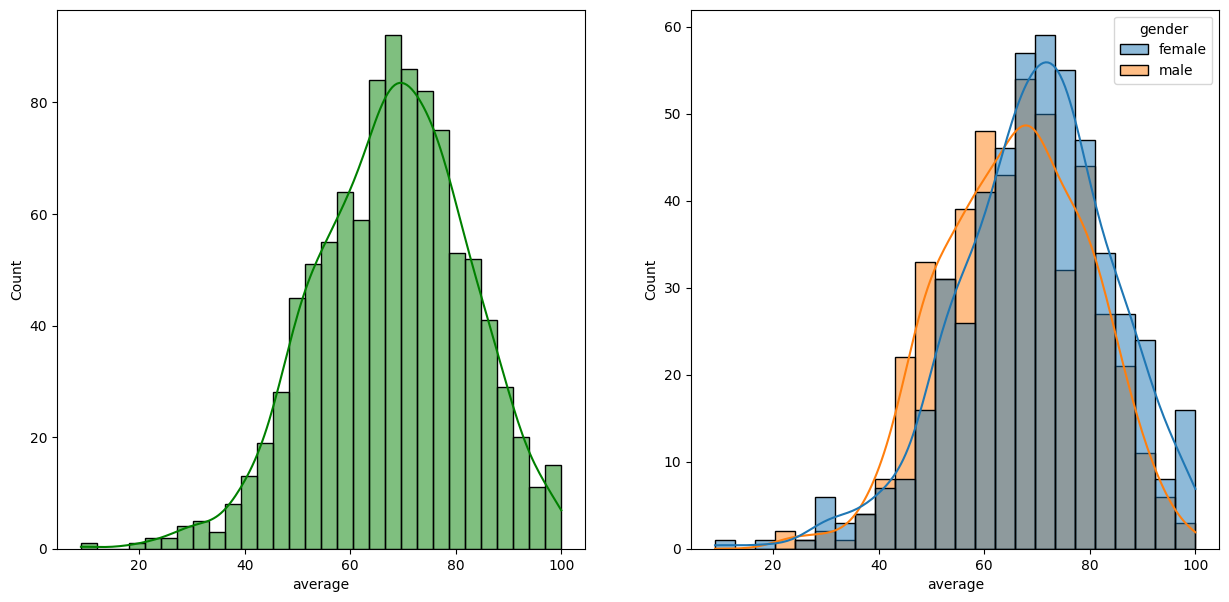

In [100]:

fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='average',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='average',kde=True,hue='gender')
plt.show()

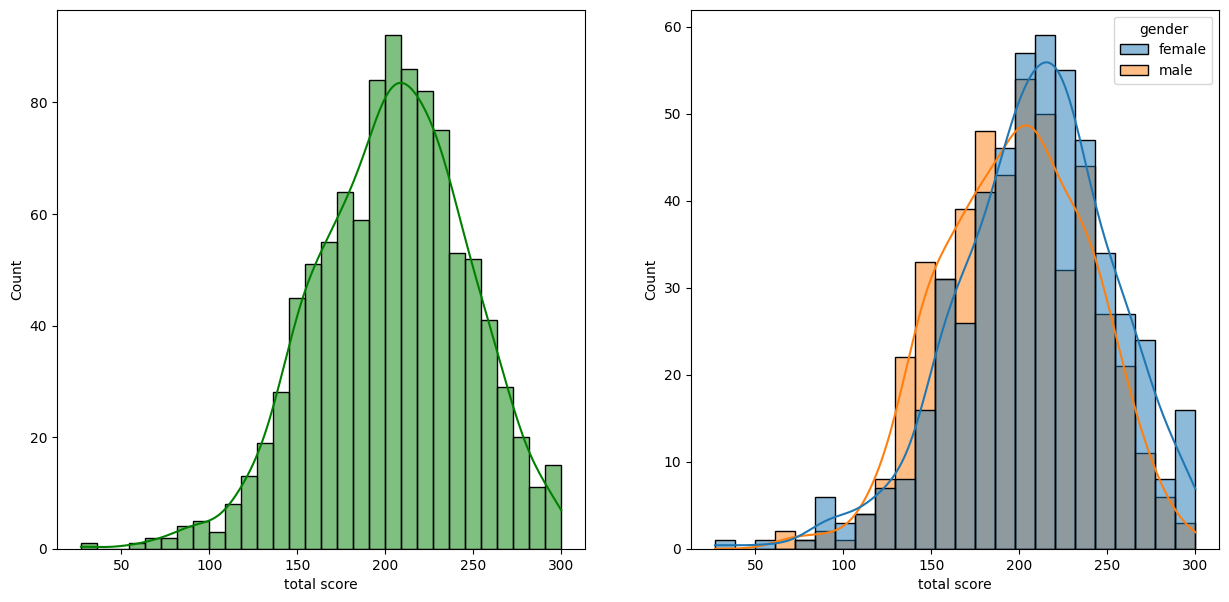

In [101]:

fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='total score',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='total score',kde=True,hue='gender')
plt.show()

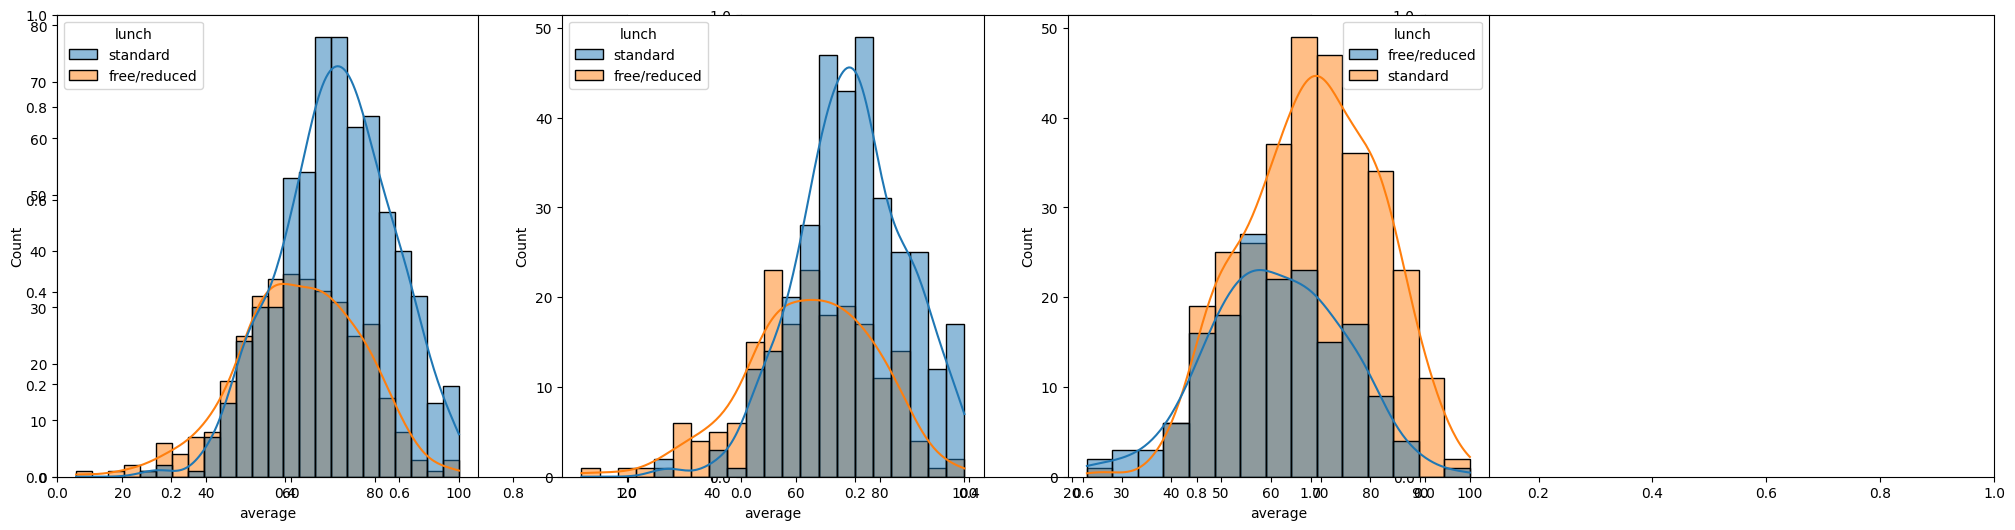

In [102]:

plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='average',kde=True,hue='lunch')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='lunch')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='lunch')
plt.show()

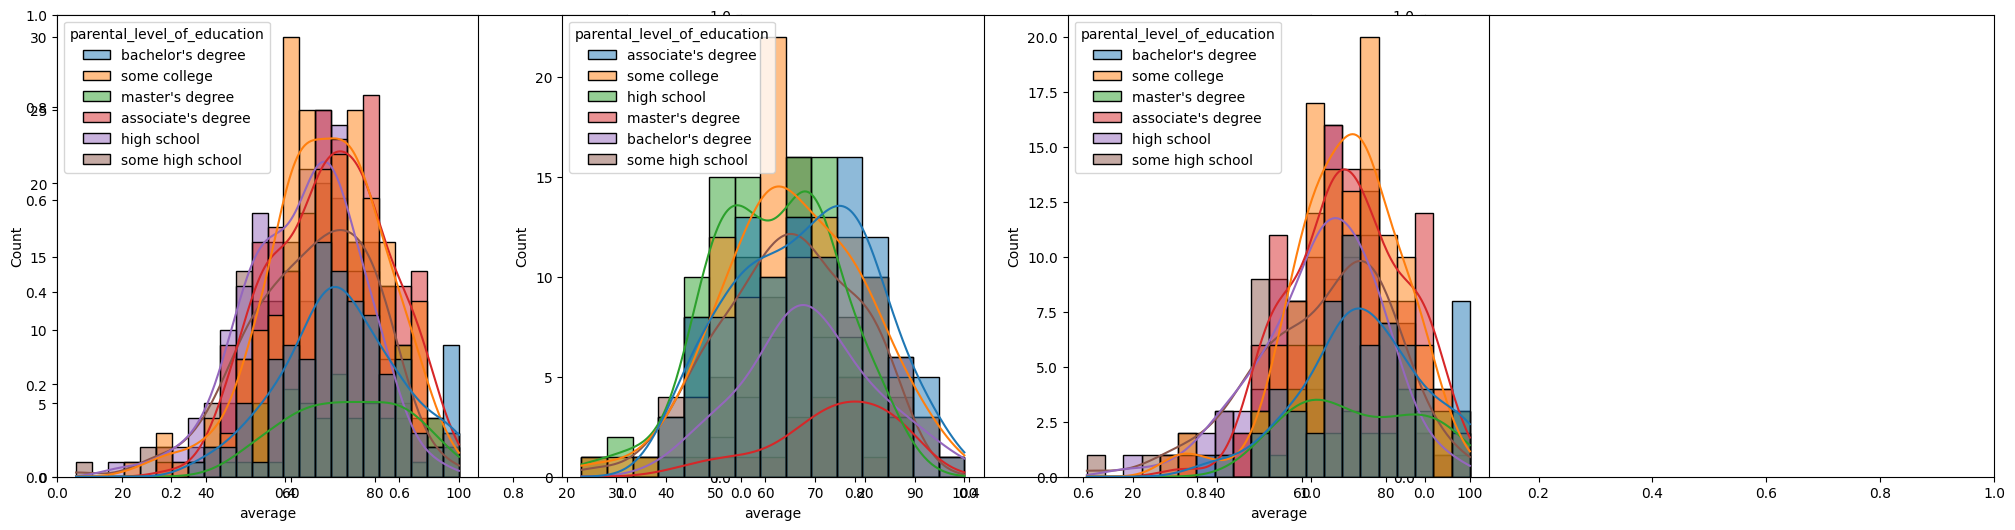

In [103]:

plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=df,x='average',kde=True,hue='parental_level_of_education')
plt.subplot(142)
ax =sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='parental_level_of_education')
plt.subplot(143)
ax =sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='parental_level_of_education')
plt.show()

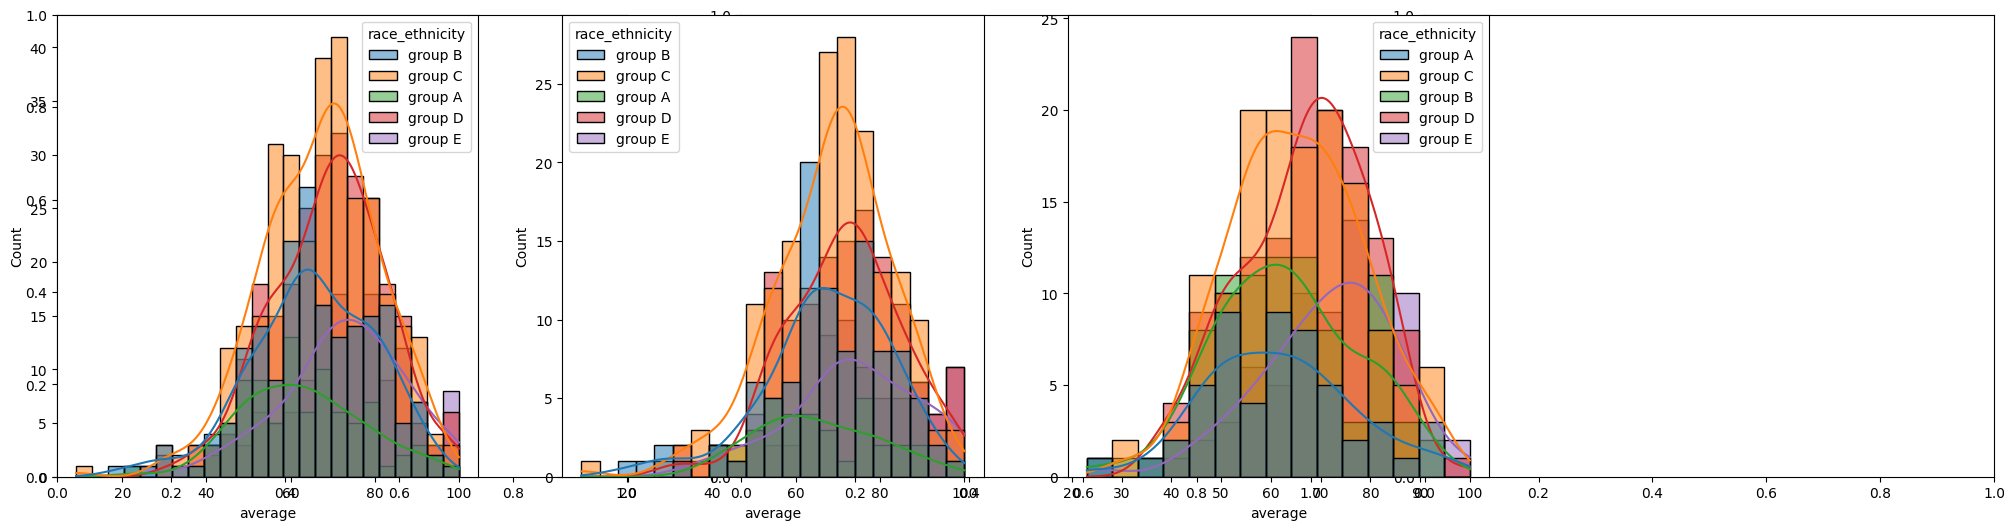

In [104]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=df,x='average',kde=True,hue='race_ethnicity')
plt.subplot(142)
ax =sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='race_ethnicity')
plt.subplot(143)
ax =sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='race_ethnicity')
plt.show()

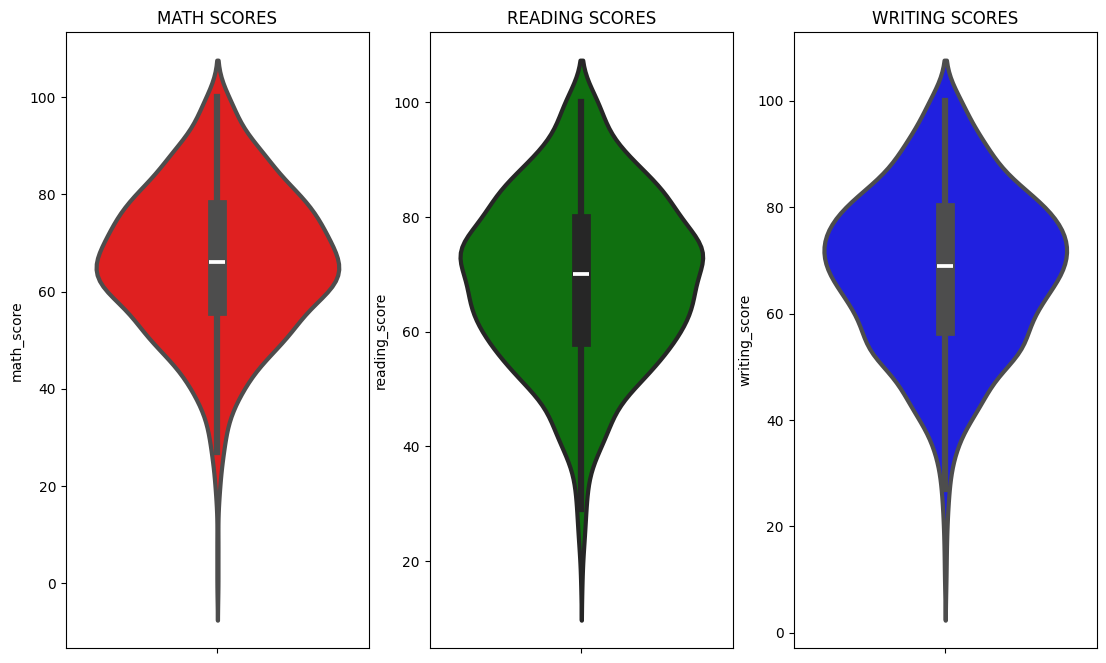

In [105]:
plt.figure(figsize=(18,8))
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math_score',data=df,color='red',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading_score',data=df,color='green',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing_score',data=df,color='blue',linewidth=3)
plt.show()

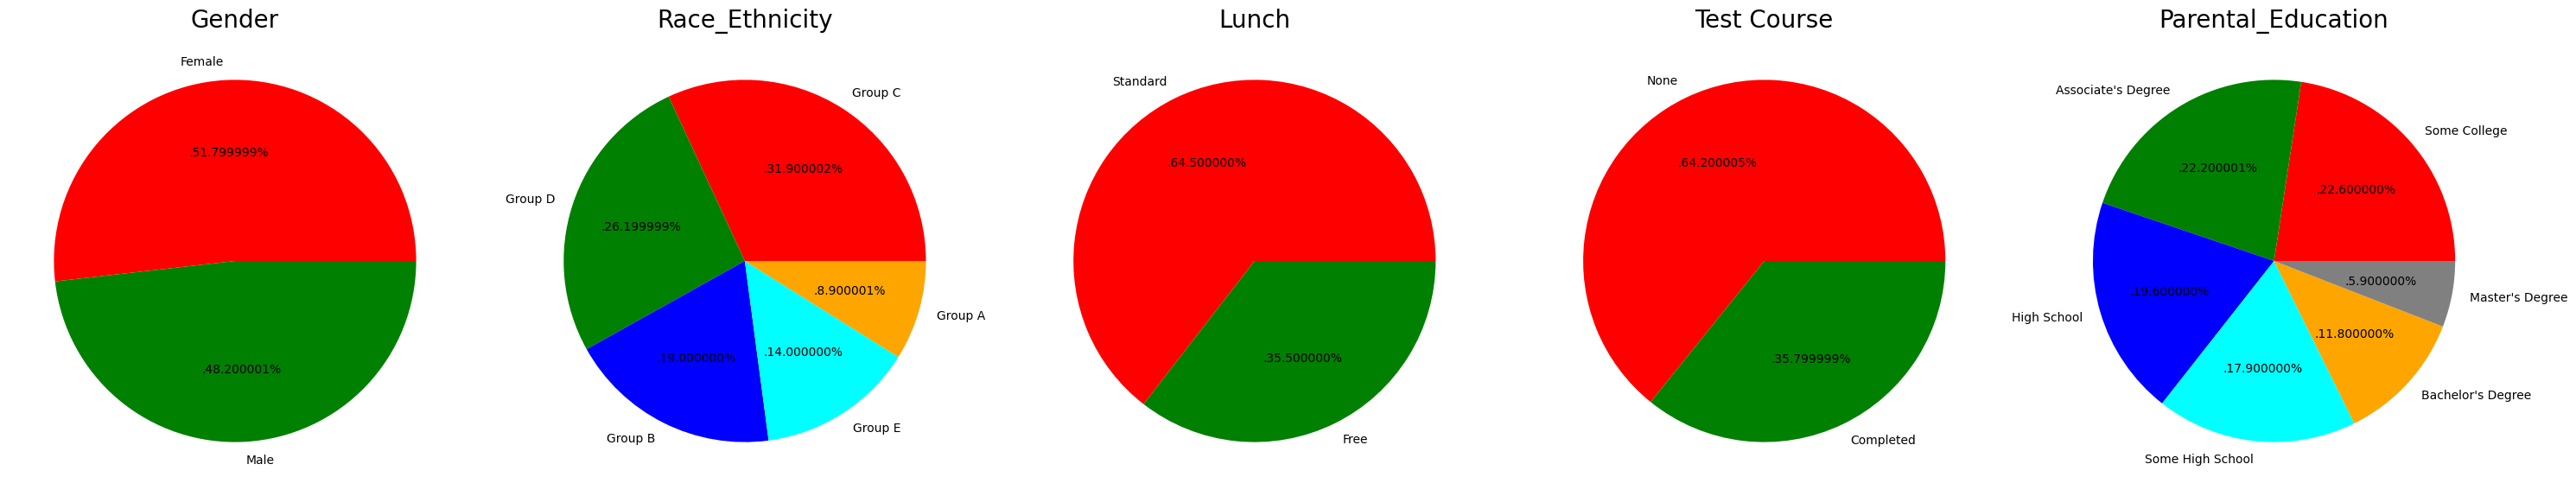

In [106]:
plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1, 5, 1)
size = df['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red','green']


plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 2)
size = df['race_ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Race_Ethnicity', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 4)
size = df['test_preparation_course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Test Course', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 5)
size = df['parental_level_of_education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Parental_Education', fontsize = 20)
plt.axis('off')


plt.tight_layout()
plt.grid()

plt.show()

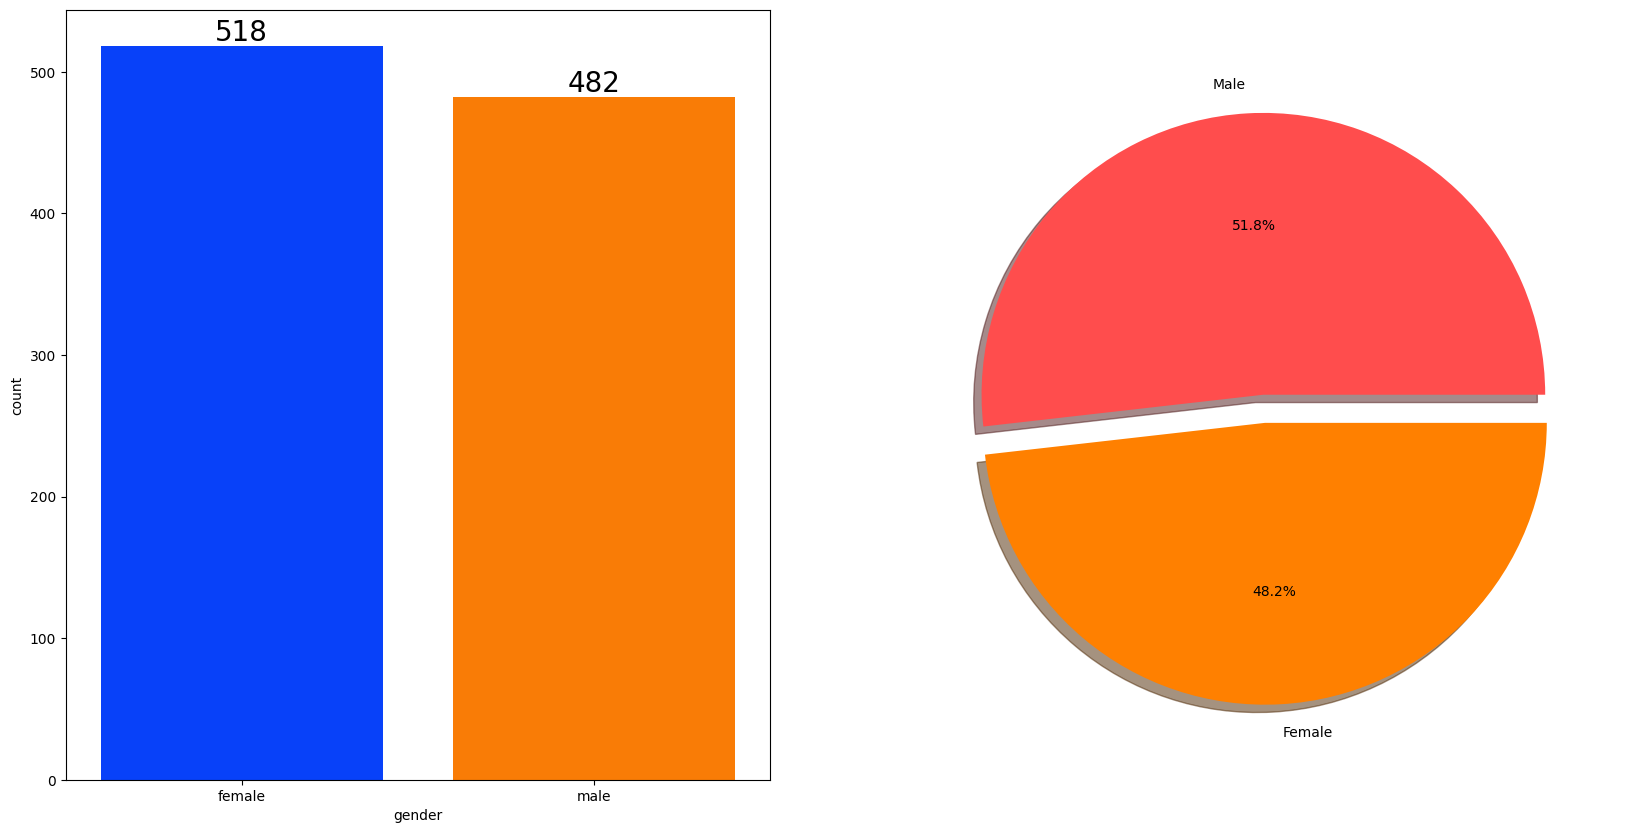

In [107]:

f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['gender'],data=df,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x=df['gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

In [121]:
numerical_cols = df.select_dtypes(include='number').columns

gender_group = df.groupby('gender')[numerical_cols].mean()
gender_group


,math_score,reading_score,writing_score,total score,average,average_score
gender,,,,,,
female,63.633205,72.608108,72.467181,208.708494,69.569498,69.569498
male,68.728216,65.473029,63.311203,197.512448,65.837483,65.837483


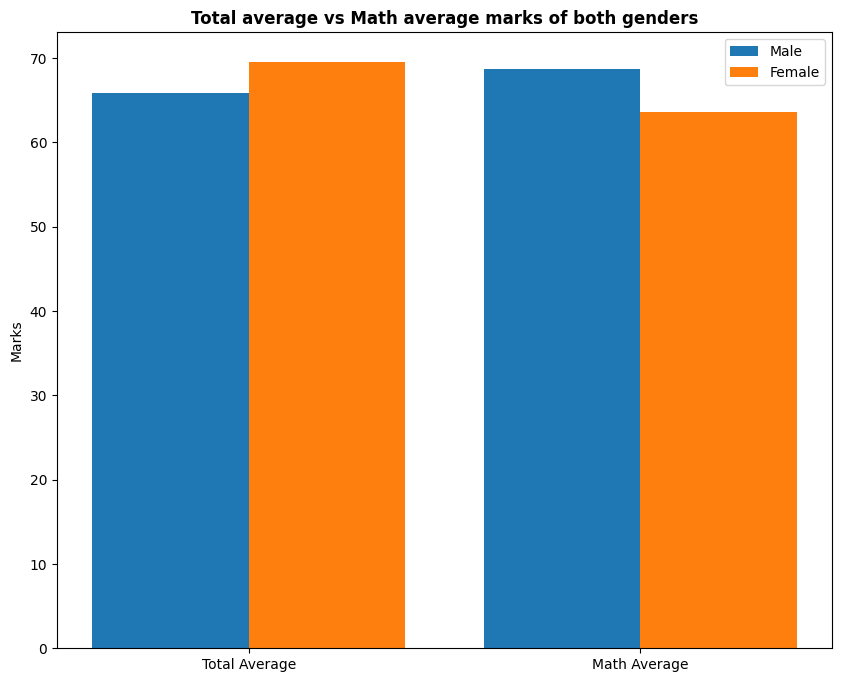

In [124]:
plt.figure(figsize=(10, 8))

X = ['Total Average', 'Math Average']

female_scores = [
    gender_group.loc['female', 'average'],
    gender_group.loc['female', 'math_score']
]

male_scores = [
    gender_group.loc['male', 'average'],
    gender_group.loc['male', 'math_score']
]

X_axis = np.arange(len(X))

plt.bar(X_axis - 0.2, male_scores, 0.4, label='Male')
plt.bar(X_axis + 0.2, female_scores, 0.4, label='Female')

plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total average vs Math average marks of both genders", fontweight='bold')
plt.legend()
plt.show()


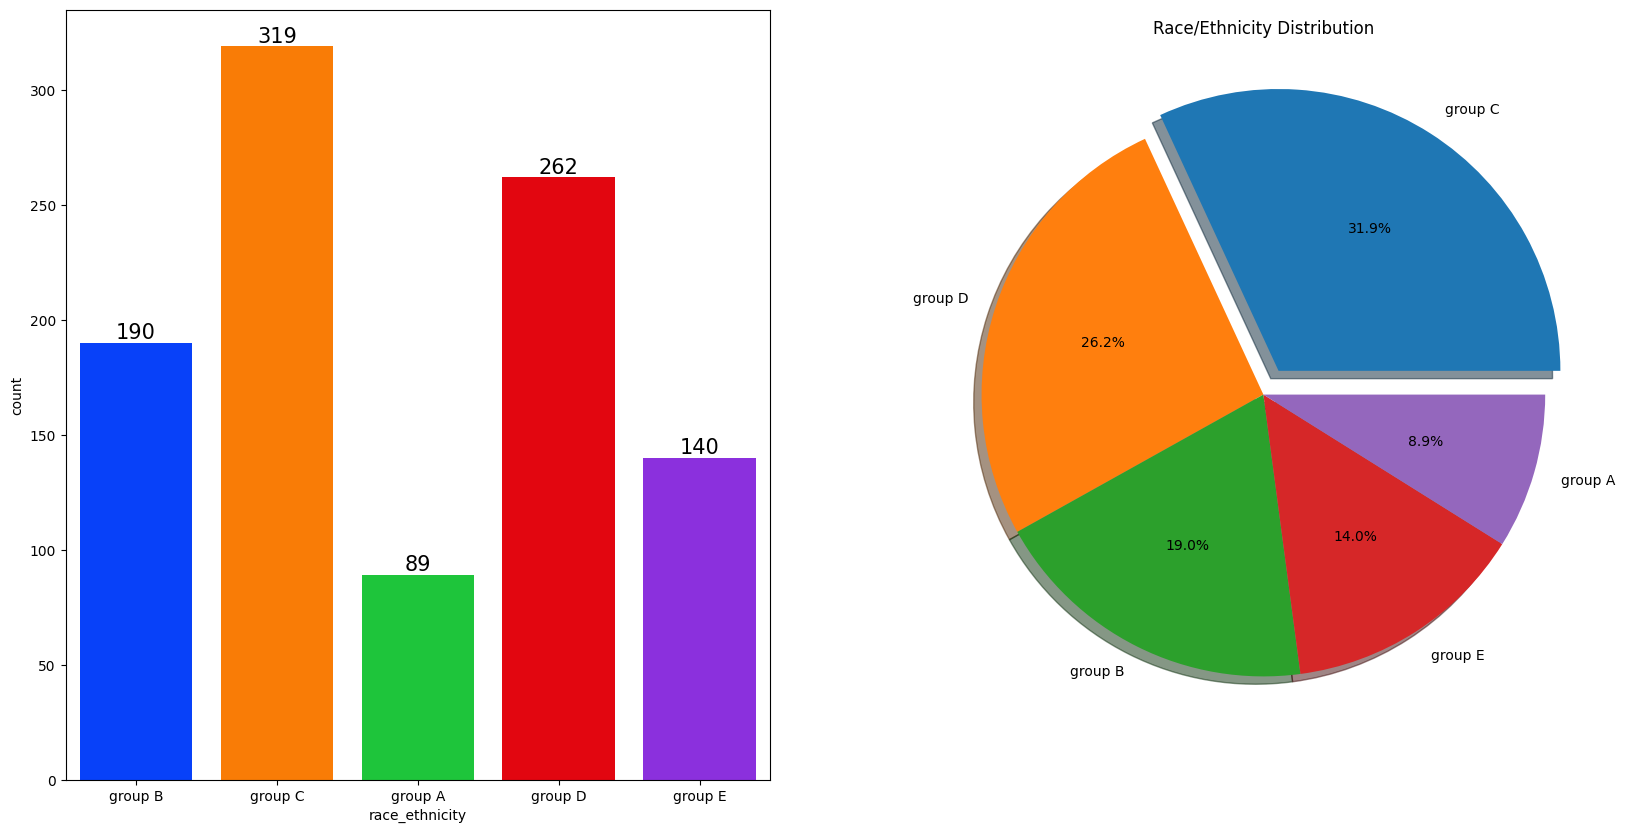

In [125]:
f, ax = plt.subplots(1, 2, figsize=(20, 10))

sns.countplot(
    x='race_ethnicity',
    data=df,
    palette='bright',
    ax=ax[0],
    saturation=0.95
)

for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=15)

ax[1].pie(
    df['race_ethnicity'].value_counts(),
    labels=df['race_ethnicity'].value_counts().index,
    explode=[0.1, 0, 0, 0, 0],
    autopct='%1.1f%%',
    shadow=True
)

ax[1].set_title("Race/Ethnicity Distribution")

plt.show()


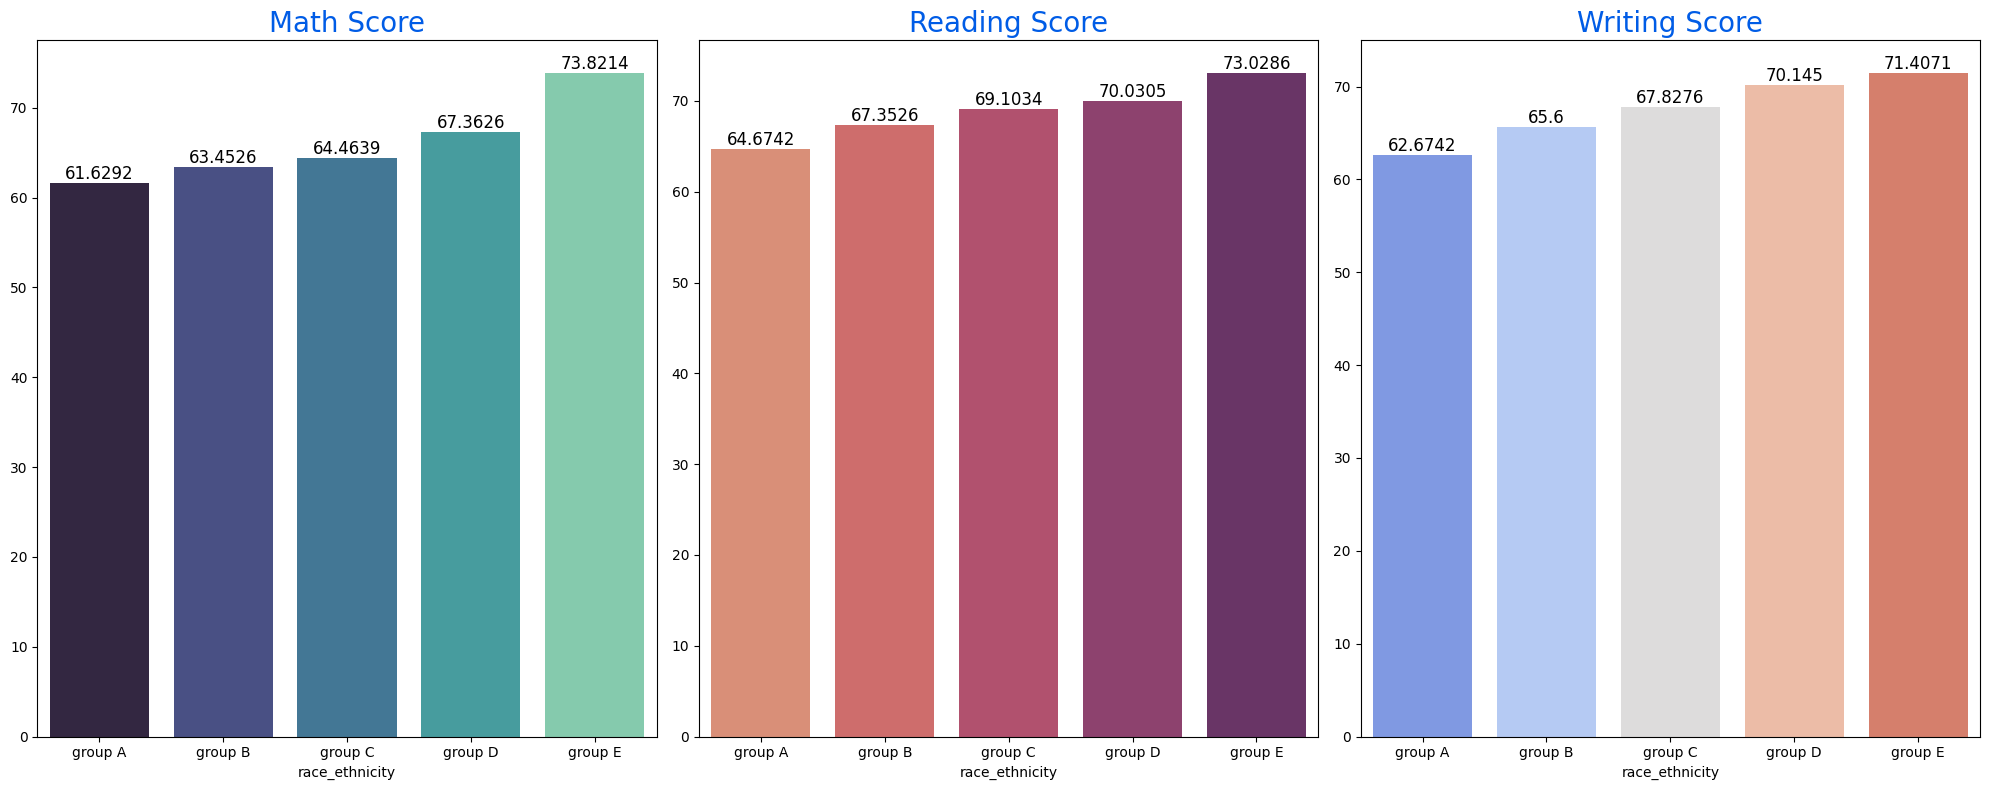

In [126]:
Group_data2 = df.groupby('race_ethnicity')

f, ax = plt.subplots(1, 3, figsize=(20, 8))

# Math Score
sns.barplot(
    x=Group_data2['math_score'].mean().index,
    y=Group_data2['math_score'].mean().values,
    palette='mako',
    ax=ax[0]
)
ax[0].set_title('Math Score', color='#005ce6', size=20)

for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=12)


# Reading Score
sns.barplot(
    x=Group_data2['reading_score'].mean().index,
    y=Group_data2['reading_score'].mean().values,
    palette='flare',
    ax=ax[1]
)
ax[1].set_title('Reading Score', color='#005ce6', size=20)

for container in ax[1].containers:
    ax[1].bar_label(container, color='black', size=12)


# Writing Score
sns.barplot(
    x=Group_data2['writing_score'].mean().index,
    y=Group_data2['writing_score'].mean().values,
    palette='coolwarm',
    ax=ax[2]
)
ax[2].set_title('Writing Score', color='#005ce6', size=20)

for container in ax[2].containers:
    ax[2].bar_label(container, color='black', size=12)

plt.tight_layout()
plt.show()


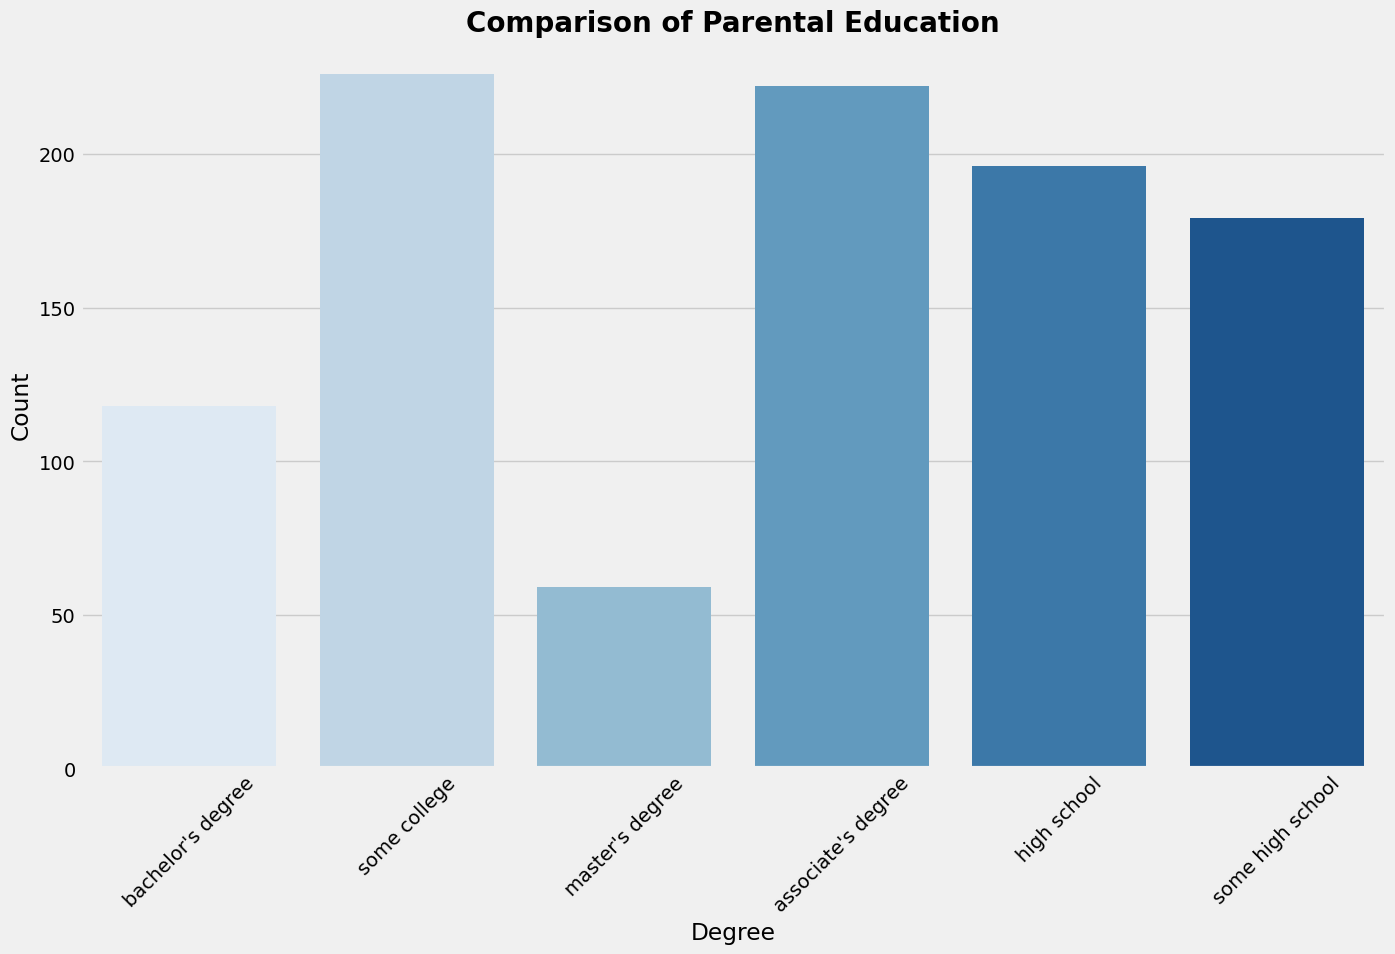

In [128]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight')

sns.countplot(
    x='parental_level_of_education',
    data=df,
    palette='Blues'
)

plt.title('Comparison of Parental Education', fontsize=20, fontweight='bold')
plt.xlabel('Degree')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


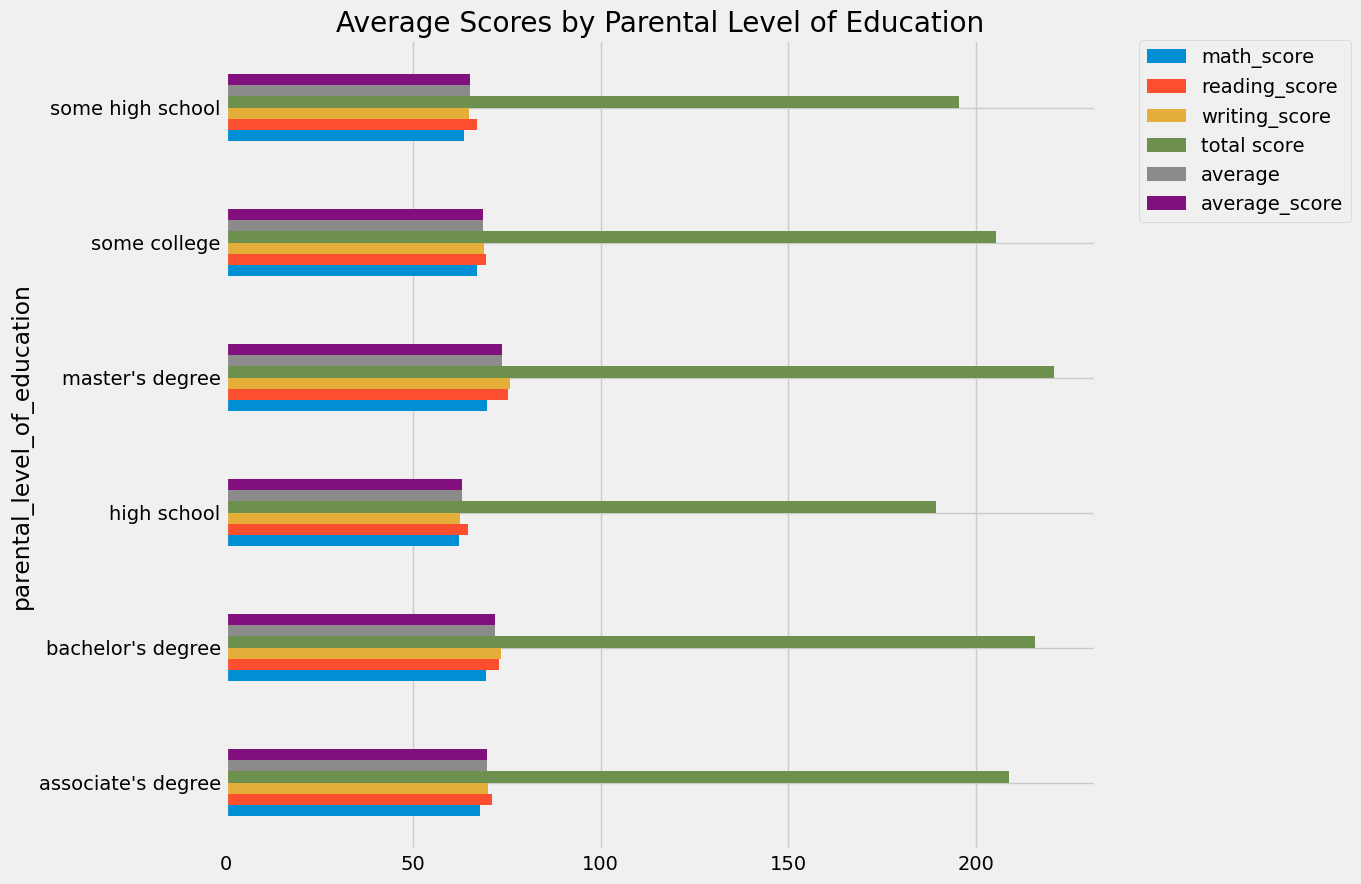

In [129]:
df.groupby('parental_level_of_education') \
  .mean(numeric_only=True) \
  .plot(kind='barh', figsize=(10,10))

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title("Average Scores by Parental Level of Education")
plt.show()


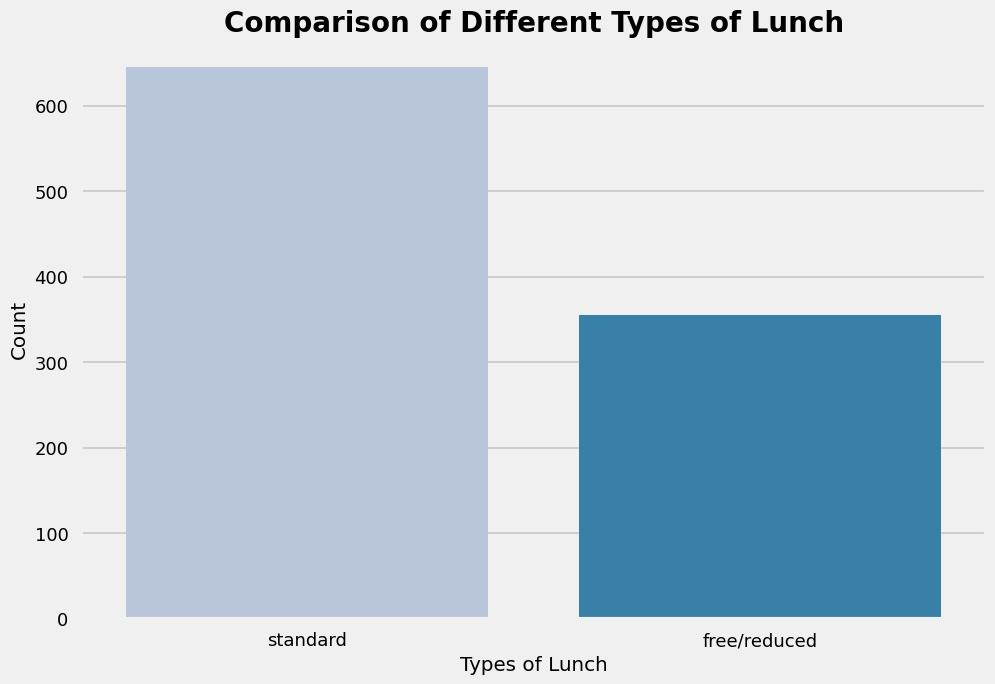

In [130]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('seaborn-v0_8-talk')   # safer style name

sns.countplot(
    x='lunch',
    data=df,
    palette='PuBu'
)

plt.title('Comparison of Different Types of Lunch', fontsize=20, fontweight='bold')
plt.xlabel('Types of Lunch')
plt.ylabel('Count')
plt.show()


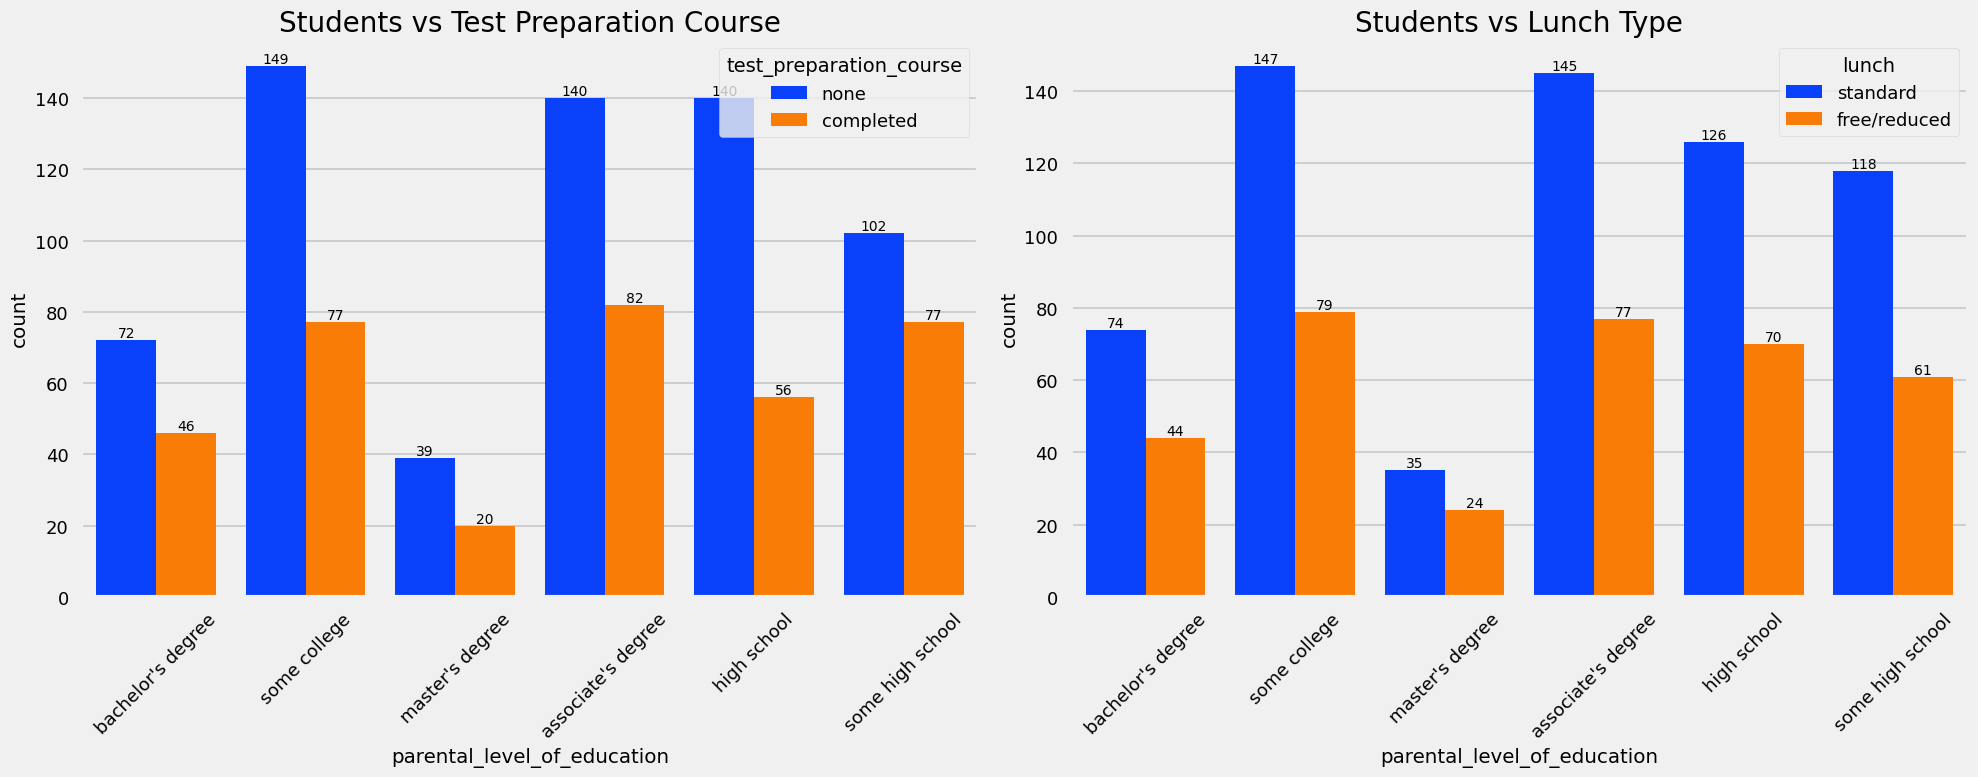

In [131]:
f, ax = plt.subplots(1, 2, figsize=(20, 8))

# Plot 1: Parental Education vs Test Preparation
sns.countplot(
    x='parental_level_of_education',
    data=df,
    hue='test_preparation_course',
    palette='bright',
    saturation=0.95,
    ax=ax[0]
)

ax[0].set_title('Students vs Test Preparation Course', color='black', size=20)
ax[0].tick_params(axis='x', rotation=45)

for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=10)


# Plot 2: Parental Education vs Lunch
sns.countplot(
    x='parental_level_of_education',
    data=df,
    hue='lunch',
    palette='bright',
    saturation=0.95,
    ax=ax[1]
)

ax[1].set_title('Students vs Lunch Type', color='black', size=20)
ax[1].tick_params(axis='x', rotation=45)

for container in ax[1].containers:
    ax[1].bar_label(container, color='black', size=10)

plt.tight_layout()
plt.show()


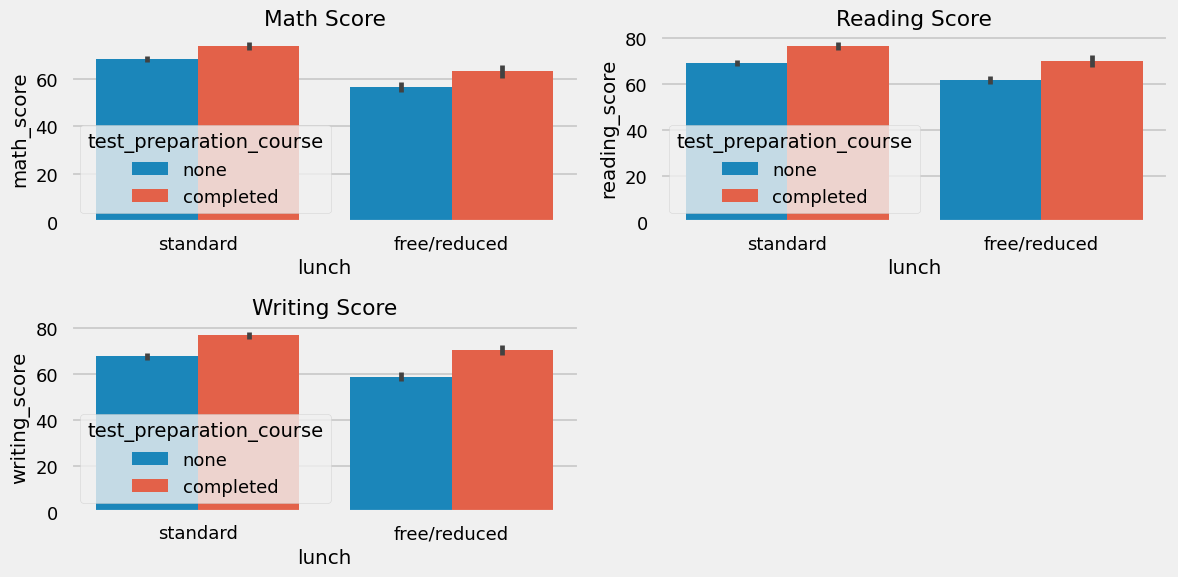

In [132]:
plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1)
sns.barplot(
    x='lunch',
    y='math_score',
    hue='test_preparation_course',
    data=df
)
plt.title("Math Score")

plt.subplot(2, 2, 2)
sns.barplot(
    x='lunch',
    y='reading_score',
    hue='test_preparation_course',
    data=df
)
plt.title("Reading Score")

plt.subplot(2, 2, 3)
sns.barplot(
    x='lunch',
    y='writing_score',
    hue='test_preparation_course',
    data=df
)
plt.title("Writing Score")

plt.tight_layout()
plt.show()


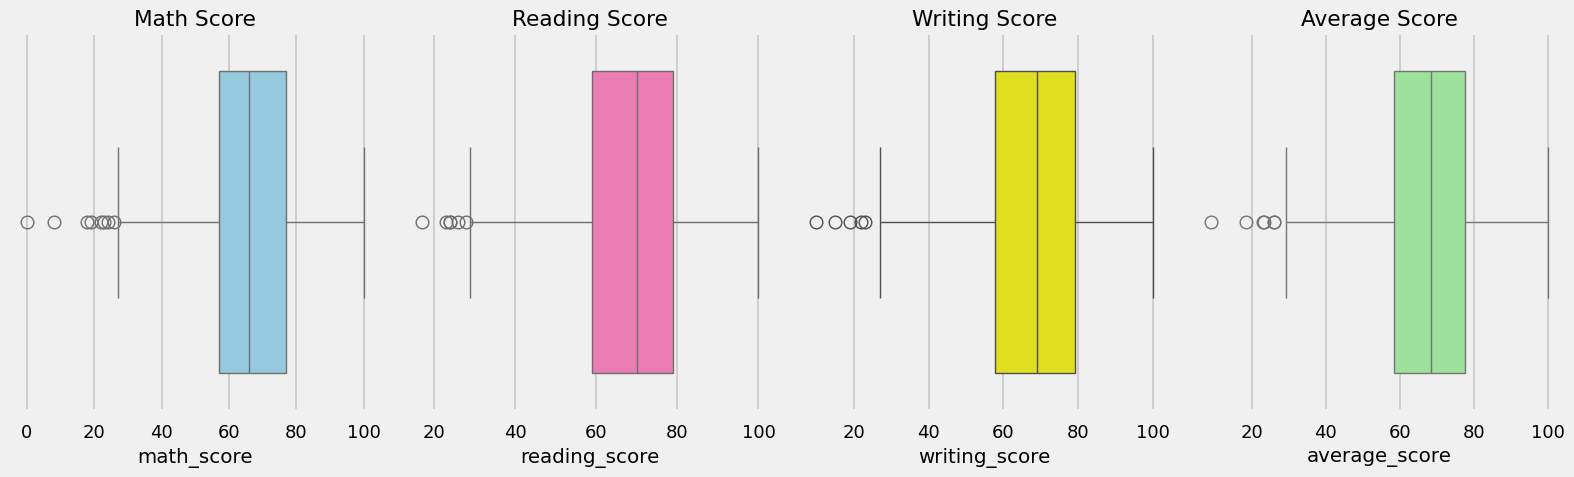

In [133]:
plt.figure(figsize=(16, 5))

plt.subplot(141)
sns.boxplot(x='math_score', data=df, color='skyblue')
plt.title("Math Score")

plt.subplot(142)
sns.boxplot(x='reading_score', data=df, color='hotpink')
plt.title("Reading Score")

plt.subplot(143)
sns.boxplot(x='writing_score', data=df, color='yellow')
plt.title("Writing Score")

plt.subplot(144)
sns.boxplot(x='average_score', data=df, color='lightgreen')
plt.title("Average Score")

plt.tight_layout()
plt.show()


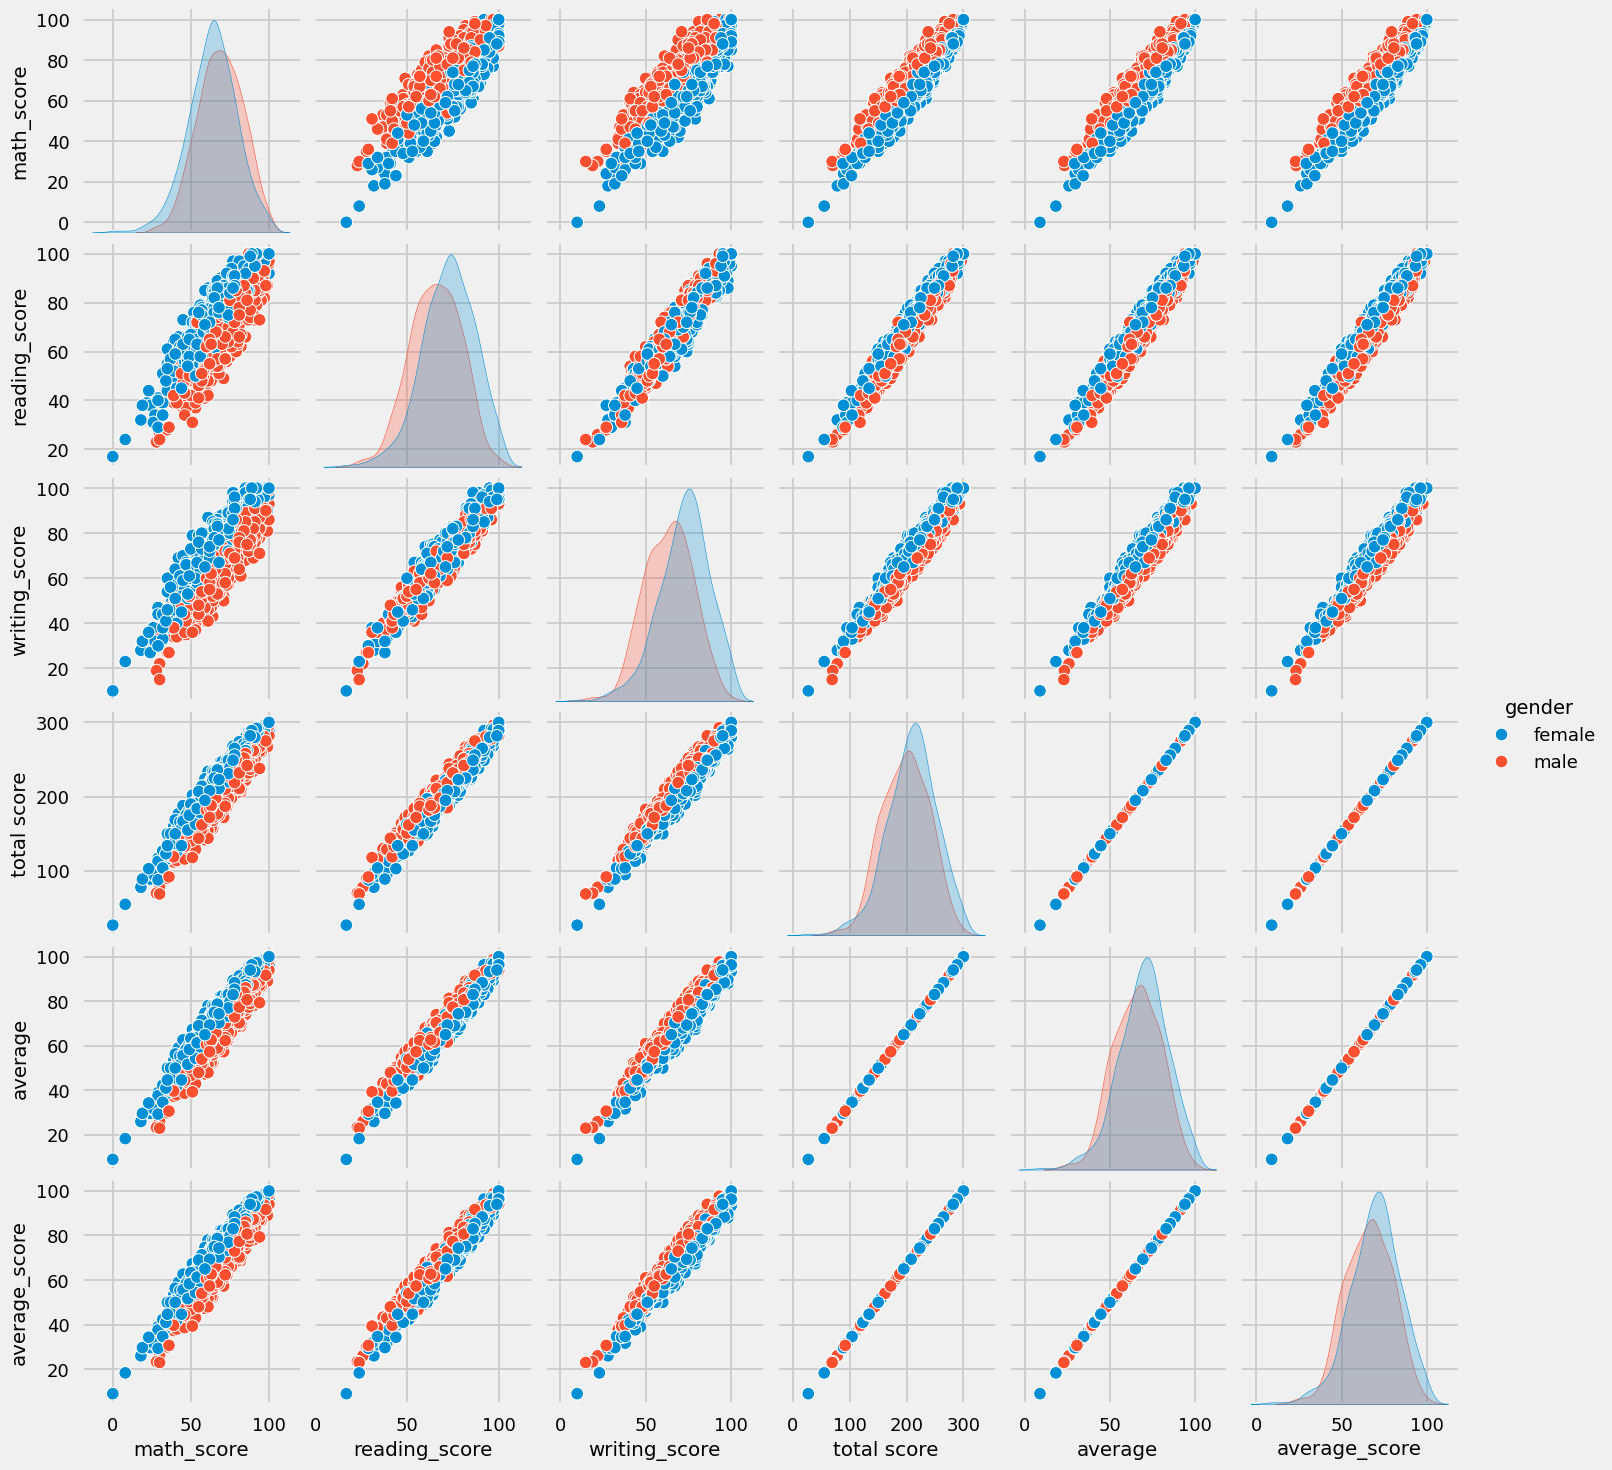

In [134]:
sns.pairplot(df, hue='gender')
plt.show()
